# 9.3 Visualisierung von DataFrames mit Fehlerbalken

## Lernziele

```{admonition} Lernziele
:class: admonition-goals
* Sie können den Zeilenindex **.index** und den Spaltenindex **.columns** aus einem DataFrame extrahieren.
* Sie können den Text der Achsenbeschriftung drehen.
* Sie können mit **axhline()** zu einem Plot eine horizontale
  Linie hinzufügen.
* Sie können Fehlerbalken mit **errorbar()** visualisieren.
```

## Visualisierung von DataFrames

Aber wie kombinieren wir jetzt die Funktionalitäten des Pandas-Moduls mit denen
des Matplotlib-Moduls? Der grundlegende Datentyp für Matplotlib ist das
NumPy-Array und auch in den Pandas-Datenobjekten stecken im Kern NumPy-Arrays.
Daher funktionieren die Plotting-Funktionalitäten von Matplotlib direkt.
Wünschenswert wäre allerdings, den Zeilen- oder den Spaltenindex für die
Beschriftung zu nehmen. Beides ist in dem DataFrame-Objekt abgespeichert. Wir
können mit

* ``.index`` auf den Zeilenindex und
* ``.columns`` auf den Spaltenindex

zugreifen. Übrigens, ``.values`` liefert die Werte in der Tabelle als
NumPy-Array zurück. Aber das brauchen wir für die Visualisierung nicht, denn die
Tabellendaten können direkt viualisiert werden. 

Wir verwenden wieder einen realistischen Datensatz und importieren den uns schon
bekannten Datensatz der Top7-Fußballvereine der Bundesliga 2020/21
([→ Download](https://nextcloud.frankfurt-university.de/s/yJjkkMSkWqcSxGL)).
Dann lassen wir den Zeilen- und Spaltenindex direkt anzeigen:

In [1]:
import pandas as pd

data = pd.read_csv('bundesliga_top7_offensive.csv', index_col=0)

print('Zeilenindex: ')
print(data.index)

print('Spaltenindex:')
print(data.columns)

Zeilenindex: 
Index(['Manuel Neuer', 'Thomas Müller', 'David Alaba', 'Jérôme Boateng',
       'Robert Lewandowski', 'Joshua Kimmich', 'Kingsley Coman',
       'Benjamin Pavard', 'Alphonso Davies', 'Serge Gnabry',
       ...
       'Petar Musa', 'Florian Hübner', 'Cedric Teuchert', 'Keita Endo',
       'Niko Gießelmann', 'Loris Karius', 'Akaki Gogia', 'Leon Dajaku',
       'Tim Maciejewski', 'Joshua Mees'],
      dtype='object', name='Name', length=177)
Spaltenindex:
Index(['Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts', 'Mins',
       'Goals', 'Assists', 'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA',
       'Yellow_Cards', 'Red_Cards'],
      dtype='object')


So kann man direkt die Daten aus einem Pandas-DataFrame extrahieren und
visualisieren. Wenn wir beispielsweise wissen wollen, wie alt die Spieler der
Eintracht Frankfurt sind, filtern wir zuerst. Danach stellen wir auf der x-Achse
die Namen der Spieler (= Zeilenindex) dar und auf der y-Achse das Alter ('Age').
Da es sich bei den Spielern um Kategorien, also diskrete Daten handelt,
verwenden wir ein Balkendiagramm.

Text(0.5, 1.0, 'Spielerdaten Eintracht Frankfurt 20/21')

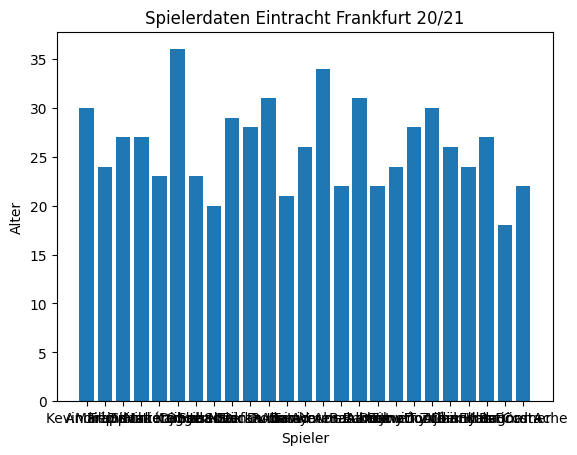

In [2]:
import matplotlib.pyplot as plt

# data
filter = data.loc[:, 'Club'] == 'Eintracht Frankfurt'
data_eintracht_frankfurt = data.loc[filter, :]
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Age']

# plot
plt.figure()
plt.bar(x,y)
plt.xlabel('Spieler')
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

Leider kann man die Spielernamen nicht mehr lesen. Wir können händisch in das
Styling der x-Achsenbeschriftung eingreifen und die die Beschriftung um 45 Grad
drehen. Dann sieht der Code folgendermaßen aus:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Kevin Trapp'),
  Text(1, 0, 'André Silva'),
  Text(2, 0, 'Filip Kostić'),
  Text(3, 0, 'Martin Hinteregger'),
  Text(4, 0, 'Daichi Kamada'),
  Text(5, 0, 'Makoto Hasebe'),
  Text(6, 0, 'Djibril Sow'),
  Text(7, 0, "Obite N'Dicka"),
  Text(8, 0, 'Sebastian Rode'),
  Text(9, 0, 'Erik Durm'),
  Text(10, 0, 'Stefan Ilsanker'),
  Text(11, 0, 'Tuta'),
  Text(12, 0, 'Amin Younes'),
  Text(13, 0, 'David Abraham'),
  Text(14, 0, 'Aymen Barkok'),
  Text(15, 0, 'Bas Dost'),
  Text(16, 0, 'Luka Jović'),
  Text(17, 0, 'Almamy Touré'),
  Text(18, 0, 'Steven Zuber'),
  Text(19, 0, 'Timothy Chandler'),
  Text(20, 0, 'Dominik Kohr'),
  Text(21, 0, 'Ajdin Hrustic'),
  Text(22, 0, 'Danny da Costa'),
  Text(23, 0, 'Elias Bördner'),
  Text(24, 0, 'Ragnar Ache')])

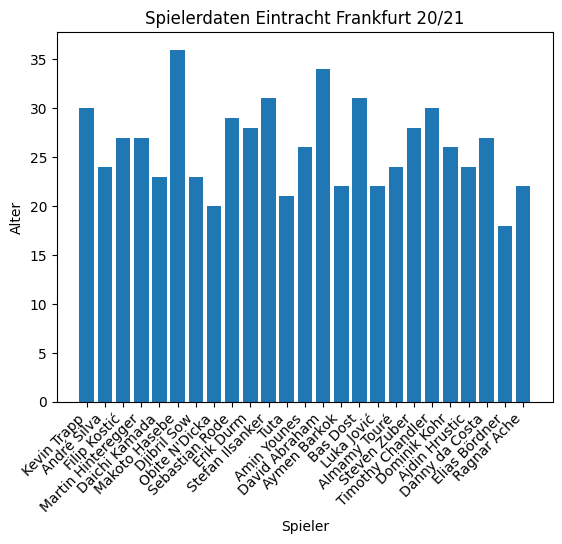

In [3]:
# plot
plt.figure()
plt.bar(x,y)
plt.xlabel('Spieler')
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

# Rotation der xticks um 45 Grad und horizontal alignment rechts
plt.xticks(rotation = 45, ha='right')

```{admonition} Mini-Übung
:class: miniexercise
Visualisieren Sie die Anzahl der Minuten, die die Spieler der Eintracht
Frankfurt auf dem Platz standen. Beschriften Sie auch x- und y-Achse und geben Sie
der Grafik einen aussagekräftigen Titel.
```

In [4]:
# Hier Ihr Code

````{admonition} Lösung
:class: miniexercise, toggle
```python
filter = data.loc[:, 'Club'] == 'Eintracht Frankfurt'
data_eintracht_frankfurt = data.loc[filter, :]

# data
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Mins']

# plot
plt.figure()
plt.bar(x,y)
plt.xlabel('Spieler')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Minuten')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')
```
````

## Plot vom Mittelwert als horizontale Linie

Als nächstes möchten wir in den Plot Zusatzinformationen mit einblenden. So
würden wir gerne sichtbar machen, wo das Durchschnittsalter der Fußballspieler
liegt. Dadurch können wir schnell ablesen, welcher Spieler über dem Durchschnitt
liegt und welcher jünger als der Durchschnitt ist.

Dazu müssen wir zunächst die Zusatzinformation aus den Daten herausholen, sprich
den Mittelwert des Alters berechnen lassen.

In [5]:
mittelwert_alter = data_eintracht_frankfurt.loc[:, 'Age'].mean()
print(f'Mittleres Alter der Spieler: {mittelwert_alter}')

Mittleres Alter der Spieler: 26.12


Und nun ergänzen wir den Plot der Altersangaben mit dem Mittelwert. Dazu
zeichnen wir eine horizontale Linie mit der Höhe des Altersdurchschnitts. Dazu
verwenden wir die Funktion `axhline()`.

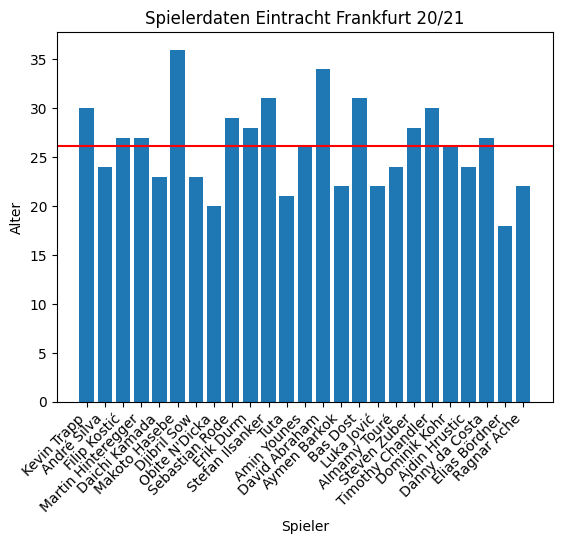

In [6]:
# Daten
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Age']

# Visualisierung
plt.figure()
plt.bar(x,y)
plt.xlabel('Spieler')
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

# Rotation der xticks um 45 Grad und horizontal alignment rechts
plt.xticks(rotation = 45, ha='right')

# horizontale Linie
plt.axhline(mittelwert_alter, color='red')

```{admonition} Mini-Übung
:class: miniexercise
Bilden Sie jetzt den Mittelwert der Minuten, die ein Spieler der Eintracht
Frankfurt durchschnittlich im Einsatz war. Ergänzen Sie Ihren Plot der letzten
Mini-Übung um eine horizontale schwarze Linie, die den Mittelwert visualisiert.
```

In [7]:
# Hier Ihr Code

````{admonition} Lösung
:class: miniexercise, toggle
```python
filter = data.loc[:, 'Club'] == 'Eintracht Frankfurt'
data_eintracht_frankfurt = data.loc[filter, :]

x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Mins']
min_durchschnitt = y.mean()

# plot
plt.figure()
plt.bar(x,y)
plt.axhline(min_durchschnitt, color='black')
plt.xlabel('Spieler')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Minuten')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')
```
````

## Plot der Standardabweichung als Fehlerbalken

Bei allen Messungen treten Messfehler auf. Manchmal weiß man von Anfang an,
welchen Messfehler das Messgerät hat. Ein anderes Mal hat man beispielsweise
eine Messung zehnmal wiederholt und möchte nun den Mittelwert als Datenpunkt und
die Standardabweichung der Messergebnisse als Fehlerbalken visualisieren. Durch
die Angabe eines Fehlerbalkens kann man dem Betrachter eine Zusatzinformation
mitteilen. Für die Darstellung von Fehlerbalken stellt das Matplotlib-Modul die
Methode ``errorbar()`` zur Verfügung. Mehr Informationen gibt es auf der
Hilfeseite

> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

Text(0.5, 1.0, 'Spielerdaten Eintracht Frankfurt 20/21')

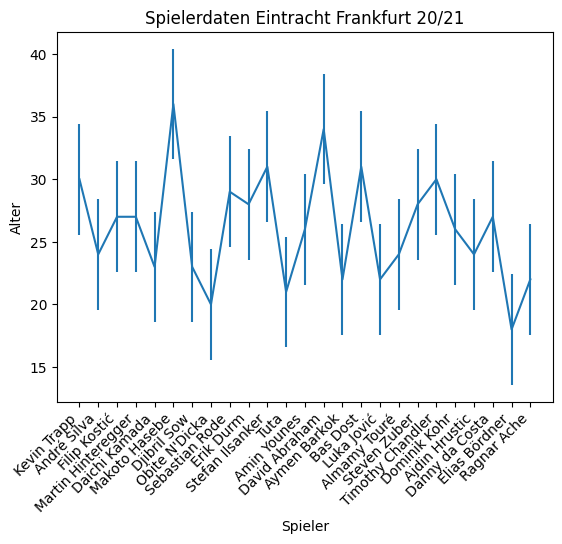

In [8]:
# data
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Age']
standardabweichung_alter = y.std()

# plot data
plt.figure()
plt.errorbar(x, y, yerr=standardabweichung_alter)

# styling
plt.xlabel('Spieler')
plt.xticks(x, rotation = 45, ha='right')    # um 45 Grad
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

Die Grafik sieht irritierend aus, da die Altersangben der Spieler verbunden
wurden. Ästhetischer und besser interpretierbar wird die Grafik, wenn wir noch
ein wenig an den Optionen herumschrauben. Mit der Formatierung `fmt='o'` werden
die Messwerte als Kreise dargestellt.

Text(0.5, 1.0, 'Spielerdaten Eintracht Frankfurt 20/21')

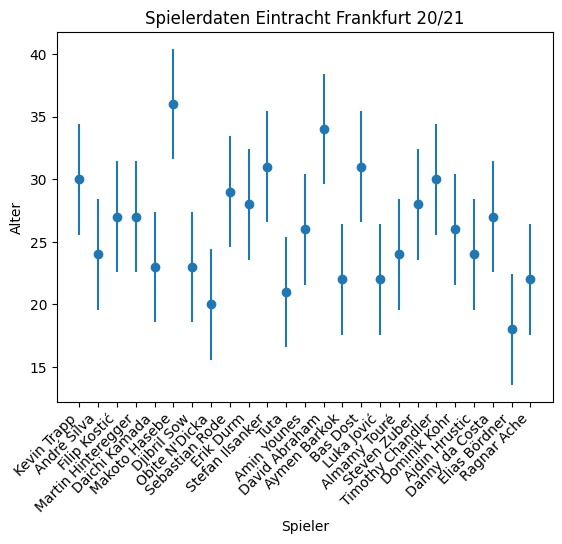

In [9]:
# data
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Age']
standardabweichung_alter = y.std()

# plot data
plt.figure()
plt.errorbar(x, y, yerr=standardabweichung_alter, fmt='o')

# styling
plt.xlabel('Spieler')
plt.xticks(x, rotation = 45, ha='right')    # um 45 Grad
plt.ylabel('Alter')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')

```{admonition} Mini-Übung
:class: miniexercise
Lassen Sie nun die Standardabweichung der Minuten visualisieren, die ein Spieler der Eintracht
Frankfurt durchschnittlich im Einsatz war. 
```

In [10]:
# Hier Ihr Code

````{admonition} Lösung
:class: miniexercise, toggle
```python
filter = data.loc[:, 'Club'] == 'Eintracht Frankfurt'
data_eintracht_frankfurt = data.loc[filter, :]

x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Mins']
min_standardabweichung = y.std()

# plot
plt.figure()
plt.errorbar(x,y, yerr=min_standardabweichung, fmt='o')
plt.xlabel('Spieler')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Minuten')
plt.title('Spielerdaten Eintracht Frankfurt 20/21')
```
````

## Zusammenfassung und Ausblick

Nachdem wir uns erarbeitet haben, wie Daten aus einem DataFrame für eine
Visualisierung mit Matplotlib aufbereitet werden, lernen wir im nächsten
Abschnitt noch einen weiteren Diagrammtyp kennen, das Histogramm.